In [1]:
import torch
import torch.nn as nn

In [14]:
class Module(nn.Module):
    
    def __init__(self,num_features):
        
        super().__init__()  
        self.network=nn.Sequential(
            nn.Linear(num_features,3), 
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid() 
        )

    def forward(self,features):
        
        out=self.network(features)                              
        return out                                                                            
        
        

In [15]:
# create dataset
features=torch.rand(10,5)

#create model
model=Module(features.shape[1])

#call model forward pass
model(features) # can also do model.forward(features)

tensor([[0.3973],
        [0.3872],
        [0.3871],
        [0.3924],
        [0.3891],
        [0.3978],
        [0.3881],
        [0.3991],
        [0.4013],
        [0.3955]], grad_fn=<SigmoidBackward0>)

In [19]:
model.network[0].weight

Parameter containing:
tensor([[-0.4372,  0.2394,  0.2271, -0.2314, -0.2580],
        [-0.2113, -0.1864,  0.1228,  0.3606,  0.2970],
        [ 0.4088,  0.1574,  0.2339, -0.4418,  0.2344]], requires_grad=True)

In [21]:
# model.linear2.weight
model.network[2].weight

Parameter containing:
tensor([[-0.1686,  0.1583,  0.0411]], requires_grad=True)

In [10]:
model.linear1.bias

Parameter containing:
tensor([-0.1772, -0.3202, -0.2430], requires_grad=True)

In [12]:
from torchinfo import summary

summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Module                                   [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

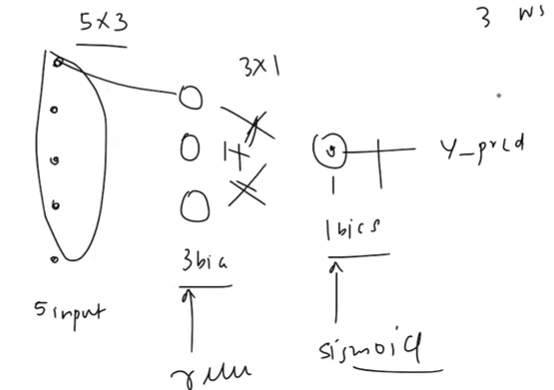